In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

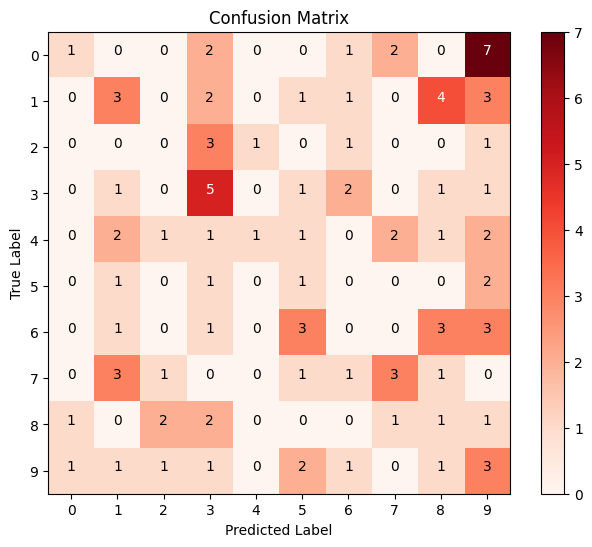

In [ ]:
file_path = "2025_10_30/001/epoch_0/training_results.csv"
data = pd.read_csv(file_path)

confusion_matrix = np.zeros((10, 10), dtype=int)
for index, row in data.iterrows():
    true_label = int(row['Label'])
    predicted_label = int(row['Prediction'])
    confusion_matrix[true_label][predicted_label] += 1

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Reds)
# Overlay counts on the heatmap
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [114]:
# From confusion matrix, calculate accuracy
correct_predictions = np.trace(confusion_matrix)
total_predictions = np.sum(confusion_matrix)
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

# It saves correct in pd
accuracy = data['Correct'].sum() / len(data)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 18.00%
Accuracy: 18.00%


In [112]:
# Print the average Reward for each label, print from largest to smallest
average_rewards = []
for label in range(10):
    label_data = data[data['Label'] == label]
    average_reward = label_data['Reward'].mean()
    average_rewards.append((label, average_reward))

# Sort by average reward
average_rewards.sort(key=lambda x: x[1], reverse=True)

for label, avg_reward in average_rewards:
    print(f'Average Reward for label {label}: {avg_reward:.2f}')

Average Reward for label 5: -3.07
Average Reward for label 3: -3.49
Average Reward for label 9: -3.80
Average Reward for label 7: -3.93
Average Reward for label 2: -4.65
Average Reward for label 1: -5.17
Average Reward for label 8: -5.59
Average Reward for label 6: -5.97
Average Reward for label 4: -6.01
Average Reward for label 0: -7.98
